# Get ijson library to deal with huge JSON datasets

In [7]:
#https://jakevdp.github.io/blog/2017/12/05/installing-python-packages-from-jupyter/#How-to-use-Pip-from-the-Jupyter-Notebook
import sys
!{sys.executable} -m pip install ijson

  Using cached https://files.pythonhosted.org/packages/7f/e9/8508c5f4987ba238a2b169e582c1f70a47272b22a2f1fb06b9318201bb9e/ijson-2.3-py2.py3-none-any.whl


You are using pip version 9.0.1, however version 19.1 is available.
You should consider upgrading via the 'python -m pip install --upgrade pip' command.


In [8]:
import ijson

In [ ]:
# Stumble onto walkthrough of working with large datasets <_<

In [9]:
# Thank you Prof for the smaller JSON file!!!

file = r"datasets/MoCoViolations_2018.json"

# https://www.dataquest.io/blog/python-json-tutorial/ # found through Google search: load json file into pandas

with open(file, 'r') as f:
    objects = ijson.items(f, 'meta.view.columns.item')
    columns = list(objects)

In [13]:
column_names = [col["fieldName"] for col in columns]
column_names

[':sid',
 ':id',
 ':position',
 ':created_at',
 ':created_meta',
 ':updated_at',
 ':updated_meta',
 ':meta',
 'seq_id',
 'date_of_stop',
 'time_of_stop',
 'agency',
 'subagency',
 'description',
 'location',
 'latitude',
 'longitude',
 'accident',
 'belts',
 'personal_injury',
 'property_damage',
 'fatal',
 'commercial_license',
 'hazmat',
 'commercial_vehicle',
 'alcohol',
 'work_zone',
 'state',
 'vehicle_type',
 'year',
 'make',
 'model',
 'color',
 'violation_type',
 'charge',
 'article',
 'contributed_to_accident',
 'race',
 'gender',
 'driver_city',
 'driver_state',
 'dl_state',
 'arrest_type',
 'geolocation',
 ':@computed_region_vu5j_pcmz',
 ':@computed_region_tx5f_5em3',
 ':@computed_region_kbsp_ykn9',
 ':@computed_region_d7bw_bq6x',
 ':@computed_region_rbt8_3x7n']

In [16]:
wants = {
    "Date of Stop": 9,
    "Time of Stop": 10,
    "Agency": 11,
    "Subagency": 12,
    "Description": 13,
    "Location": 14,
    "Latitude": 15,
    "Longitude": 16,
    "Vehicle Type": 28,
    "Vehicle Year": 29,
    "Vehicle Make": 30,
    "Vehicle Model": 31,
    "Vehicle Color": 32,
    "Violation Type": 33,
    "Race": 37,
    "Gender": 38,
    "Driver's State": 40,
    "Driver's License State": 41,
    "Arrest Type": 42
}

target_cols = []

for v in wants.values():
    target_cols.append(column_names[v])

In [17]:
target_cols

['date_of_stop',
 'time_of_stop',
 'agency',
 'subagency',
 'description',
 'location',
 'latitude',
 'longitude',
 'vehicle_type',
 'year',
 'make',
 'model',
 'color',
 'violation_type',
 'race',
 'gender',
 'driver_state',
 'dl_state',
 'arrest_type']

In [18]:
data = []
with open(file, 'r') as f:
    objects = ijson.items(f, 'data.item')
    for row in objects:
        selected_row = []
        for item in target_cols:
           selected_row.append(row[column_names.index(item)])
        data.append(selected_row)

In [19]:
import pandas as pd

In [20]:
df = pd.DataFrame(data, columns=target_cols)

In [32]:
df.head()

,date_of_stop,time_of_stop,agency,subagency,description,location,latitude,longitude,vehicle_type,year,make,model,color,violation_type,race,gender,driver_state,dl_state,arrest_type,date
0,2018-12-31T00:00:00,23:56:00,MCP,"1st District, Rockville",FAILURE OF VEH. ON HWY. TO DISPLAY LIGHTED LAM...,355 @ FIRST ST,39.077920,-77.140412,02 - Automobile,2007,TOYOTA,COROLLA,BLUE,Warning,BLACK,M,MD,MD,A - Marked Patrol,2018-12-31 23:56:00
1,2018-12-31T00:00:00,23:52:00,MCP,"6th District, Gaithersburg / Montgomery Village",FAILURE TO DISPLAY TWO LIGHTED FRONT LAMPS WHE...,N FREDERICK AVE @ ODENDHAL AVE,39.148677,-77.206343,02 - Automobile,2006,LEXUS,4S,GRAY,Warning,HISPANIC,M,MD,MD,A - Marked Patrol,2018-12-31 23:52:00
2,2018-12-31T00:00:00,23:52:00,MCP,"6th District, Gaithersburg / Montgomery Village",FAILURE OF VEH. ON HWY. TO DISPLAY LIGHTED LAM...,N FREDERICK AVE @ ODENDHAL AVE,39.148677,-77.206343,02 - Automobile,2006,LEXUS,4S,GRAY,Warning,HISPANIC,M,MD,MD,A - Marked Patrol,2018-12-31 23:52:00
3,2018-12-31T00:00:00,23:45:00,MCP,"1st District, Rockville",FAILURE OF VEH. ON HWY. TO DISPLAY LIGHTED LAM...,355 @ BEAL,39.085450,-77.145103,02 - Automobile,2017,TOYOTA,COROLLA,GRAY,Warning,WHITE,F,MD,MD,A - Marked Patrol,2018-12-31 23:45:00
4,2018-12-31T00:00:00,23:44:00,MCP,Headquarters and Special Operations,FAILURE TO DRIVE VEHICLE ON RIGHT HALF OF ROAD...,FENTON ST @ COLESVILLE RD,38.997515,-77.026777,02 - Automobile,2016,CHEVROLET,IMPALA,BLACK,Warning,BLACK,M,VA,VA,A - Marked Patrol,2018-12-31 23:44:00


In [21]:
df["color"].value_counts()

BLACK          47639
SILVER         39793
WHITE          36791
GRAY           28159
RED            16180
BLUE           15513
GOLD            5694
GREEN           5359
BLUE, DARK      4483
MAROON          3303
TAN             3194
BLUE, LIGHT     2455
BEIGE           2039
N/A             1706
GREEN, DK       1520
GREEN, LGT       958
BROWN            832
ORANGE           826
YELLOW           692
BRONZE           475
PURPLE           379
MULTICOLOR       113
CREAM             85
COPPER            50
PINK              19
CHROME            11
CAMOUFLAGE         5
Name: color, dtype: int64

In [22]:
df["arrest_type"].value_counts()

A - Marked Patrol                         190336
Q - Marked Laser                           13169
B - Unmarked Patrol                         6706
G - Marked Moving Radar (Stationary)        2058
E - Marked Stationary Radar                 1344
L - Motorcycle                              1153
O - Foot Patrol                             1135
S - License Plate Recognition                593
M - Marked (Off-Duty)                        433
I - Marked Moving Radar (Moving)             429
R - Unmarked Laser                           361
H - Unmarked Moving Radar (Stationary)       250
J - Unmarked Moving Radar (Moving)           147
D - Unmarked VASCAR                           47
C - Marked VASCAR                             31
P - Mounted Patrol                            30
N - Unmarked (Off-Duty)                       27
F - Unmarked Stationary Radar                 24
Name: arrest_type, dtype: int64

In [23]:
import numpy as np

In [24]:
def parse_float(x):
    try:
        x = float(x)
    except Exception:
        x = 0
    return x

In [25]:
df["longitude"] = df["longitude"].apply(parse_float)
df["latitude"] = df["latitude"].apply(parse_float)

In [26]:
import datetime

In [27]:
def parse_full_date(row):
    date = datetime.datetime.strptime(row["date_of_stop"], "%Y-%m-%dT%H:%M:%S")
    time = row["time_of_stop"].split(":")
    date = date.replace(hour=int(time[0]), minute = int(time[1]), second = int(time[2]))
    return date

In [28]:
df["date"] = df.apply(parse_full_date, axis=1)

In [29]:
import matplotlib.pyplot as plt
%matplotlib inline

(array([ 29418.,  39330.,  35747.,  33962.,  31862.,  47954.]),
 array([ 0.,  1.,  2.,  3.,  4.,  5.,  6.]),
 <a list of 6 Patch objects>)

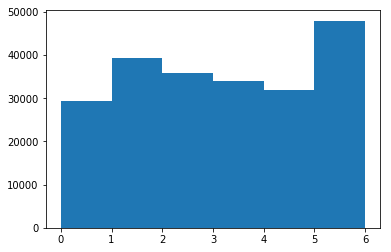

In [30]:
plt.hist(df["date"].dt.weekday, bins=6)

(array([ 12407.,  10010.,   7181.,   5308.,   3170.,   1898.,   3249.,
          7849.,  10617.,  10238.,  10572.,   8685.,   7250.,   7735.,
          7856.,   7085.,  10885.,  11499.,   9238.,   7763.,   8462.,
         12715.,  18916.,  17685.]),
 array([  0.        ,   0.95833333,   1.91666667,   2.875     ,
          3.83333333,   4.79166667,   5.75      ,   6.70833333,
          7.66666667,   8.625     ,   9.58333333,  10.54166667,
         11.5       ,  12.45833333,  13.41666667,  14.375     ,
         15.33333333,  16.29166667,  17.25      ,  18.20833333,
         19.16666667,  20.125     ,  21.08333333,  22.04166667,  23.        ]),
 <a list of 24 Patch objects>)

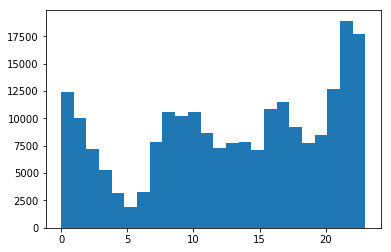

In [31]:
plt.hist(df["date"].dt.hour, bins=24)

In [ ]:
# For future reading:
# - https://chrisalbon.com/#articles
# - 

# soundtrack while making: https://youtu.be/4HAVJcvRQ_w